### AI허브
- 객체검출 API을 이용한 이미지 사람/사물 레이블 처리

In [1]:
import urllib3
import json
import base64
import sys

In [2]:
file = "this is my text"
decoded = base64.b64encode(file.encode('ascii')).decode('ascii')
decoded

'dGhpcyBpcyBteSB0ZXh0'

In [3]:
txt="dGhpcyBpcyBteSB0ZXh0"
decoded=base64.b64decode(txt.encode('ascii')).decode('ascii')
decoded

'this is my text'

In [4]:
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"   # API 연결 URL
accessKey = "fdf16766-d73d-48be-a4b3-c03276a6cfb2"       # 사용자 인증키
imageFilePath = "./data/img1.jpg"                        # 대상 이미지
type = "jpg"                # 이미지 타입

In [5]:
# 이미지 파일 읽어와 디코딩 하기
file = open(imageFilePath, "rb")
imageContents = base64.b64encode(file.read()).decode("utf8")
file.close()

In [6]:
# 딕셔너리 구조의 인증 및 요청 구조 만들기
requestJson = {
    "access_key": accessKey,
    "argument": {
        "type": type,
        "file": imageContents
    }
}

In [7]:
requestJson

{'access_key': 'fdf16766-d73d-48be-a4b3-c03276a6cfb2',
 'argument': {'type': 'jpg',
  'file': '/9j/4AAQSkZJRgABAQEASABIAAD/4QCORXhpZgAATU0AKgAAAAgAAgESAAMAAAABAAEAAIdpAAQAAAABAAAAJgAAAAAABJADAAIAAAAUAAAAXJAEAAIAAAAUAAAAcJKRAAIAAAADMDAAAJKSAAIAAAADMDAAAAAAAAAyMDIwOjA0OjEwIDEwOjE4OjQ3ADIwMjA6MDQ6MTAgMTA6MTg6NDcAAAD/4QGcaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49J++7vycgaWQ9J1c1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCc/Pg0KPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyI+PHJkZjpSREYgeG1sbnM6cmRmPSJodHRwOi8vd3d3LnczLm9yZy8xOTk5LzAyLzIyLXJkZi1zeW50YXgtbnMjIj48cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0idXVpZDpmYWY1YmRkNS1iYTNkLTExZGEtYWQzMS1kMzNkNzUxODJmMWIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyI+PHhtcDpDcmVhdGVEYXRlPjIwMjAtMDQtMTBUMTA6MTg6NDc8L3htcDpDcmVhdGVEYXRlPjwvcmRmOkRlc2NyaXB0aW9uPjwvcmRmOlJERj48L3g6eG1wbWV0YT4NCjw/eHBhY2tldCBlbmQ9J3cnPz7/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoK

In [9]:
http = urllib3.PoolManager()
response = http.request("POST", openApiURL,
                        headers={"Content-Type": "application/json; charset=UTF-8"},
                        body=json.dumps(requestJson))

In [16]:
if response.status != 200:
    sys.exit('데이터를 받지 못했습니다.')
    
json_data = json.loads(response.data)

In [17]:
json_data['return_object']['data'][0]

{'class': 'person',
 'confidence': '0.995520',
 'x': '306',
 'y': '195',
 'width': '96',
 'height': '213'}

In [20]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

In [21]:
## 이미지 분석 데이터 가져오기
json_data = json.loads(response.data)
img_data = json_data['return_object']['data']

In [41]:
## 이미지 읽어오기
img = Image.open(imageFilePath)

# 이미지에서 사용할 폰트 설정
font = ImageFont.truetype('AppleGothic', 15)

# 읽어온 이미지에 추가 가능한 이미지로 변경
dImg = ImageDraw.Draw(img)

In [42]:
# 이미지에 첫번째 정보 표시하기
info_img = img_data[0]

gubun = info_img['class']
x = int(info_img['x'])
y = int(info_img['y'])
w = int(info_img['width'])
h = int(info_img['height'])

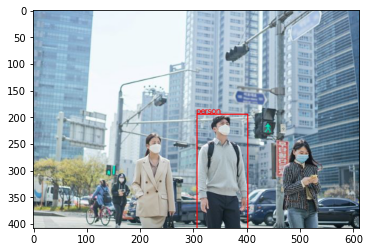

In [44]:
# 이미지에 객체 정보를 이용해 선 그리기
color = (255, 0, 0)  # rgb, 선 색 설정

# 이미지에 선 그리기
dImg.line([(x, y), (x, y+h), (x+w, y+h), (x+w, y), (x, y)], fill = color, width = 2)

# 이미지에 텍스트(정보) 입력하기
dImg.text((x, y-15), gubun, font = font, fill = color)

plt.imshow(img)

가져온 이미지에 전체 객체 정보 표시하기

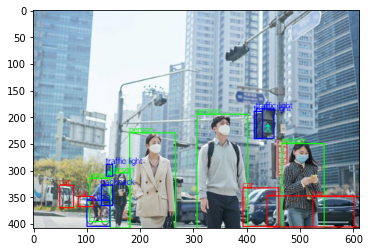

In [48]:
img = Image.open(imageFilePath)
font = ImageFont.truetype('AppleGothic', 15)
dImg = ImageDraw.Draw(img)

# 이미지에 i번째 정보 표시하기
for i in range(len(img_data)): 
    info_img = img_data[i]
    gubun = info_img['class']
    x = int(info_img['x'])
    y = int(info_img['y'])
    w = int(info_img['width'])
    h = int(info_img['height'])
    if gubun == 'person':
        color = (0, 255, 0)
    elif gubun == 'car':
        color = (255, 0, 0)  # bgr, 선 색 설정
    else:
        color = (0, 0, 255)
    dImg.line([(x, y), (x, y+h), (x+w, y+h), (x+w, y), (x, y)], fill = color, width = 2)
    dImg.text((x, y-15), gubun, font = font, fill = color)
    
plt.imshow(img)

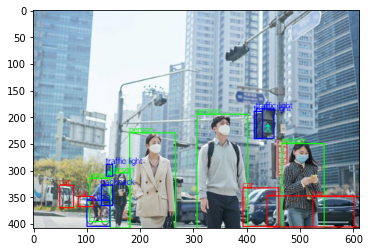

In [54]:
import urllib3
import json
import base64
import sys
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"   # API 연결 URL
accessKey = "fdf16766-d73d-48be-a4b3-c03276a6cfb2"       # 사용자 인증키
imageFilePath = "./data/img1.jpg"                        # 대상 이미지
type = "jpg"                # 이미지 타입

# 이미지 파일 읽어와 디코딩 하기
file = open(imageFilePath, "rb")
imageContents = base64.b64encode(file.read()).decode("utf8")
file.close()

# 딕셔너리 구조의 인증 및 요청 구조 만들기
requestJson = {
    "access_key": accessKey,
    "argument": {
        "type": type,
        "file": imageContents
    }
}

# 객체 확인 요청
http = urllib3.PoolManager()
response = http.request("POST", openApiURL,
                        headers={"Content-Type": "application/json; charset=UTF-8"},
                        body=json.dumps(requestJson))

# 요청결과 확인
if response.status != 200:
    sys.exit('데이터를 받지 못했습니다.')

# 받아온 데이터 저장
json_data = json.loads(response.data)

## 이미지 분석 데이터 가져오기
img_data = json_data['return_object']['data']


img = Image.open(imageFilePath)
font = ImageFont.truetype('AppleGothic', 15)
dImg = ImageDraw.Draw(img)

for i in range(len(img_data)): 
    info_img = img_data[i]
    gubun = info_img['class']
    x = int(info_img['x'])
    y = int(info_img['y'])
    w = int(info_img['width'])
    h = int(info_img['height'])
    if gubun == 'person':
        color = (0, 255, 0)
    elif gubun == 'car':
        color = (255, 0, 0)  # bgr, 선 색 설정
    else:
        color = (0, 0, 255)
    dImg.line([(x, y), (x, y+h), (x+w, y+h), (x+w, y), (x, y)], fill = color, width = 2)
    dImg.text((x, y-15), gubun, font = font, fill = color)

img.save('.' + imageFilePath.split(".")[1] + '_수정.' + imageFilePath.split(".")[-1])
plt.imshow(img)